# Semesterprojekt - Housing Price Data

Künstliche Intelligenz und Big Data Analytics <br>
Leander Engel - 580552


![Optionaler Bildtext](KuenstlicheIntelligenzundBigDataAnalyticsLeanderEngel-580552.png)

## Problem & Zielstellung

Das Hauptproblem, das in diesem Projekt adressiert wird, liegt im Bereich der Vorhersage von Immobilienpreisen, ein klassisches Problem im Sektor der Immobilienbewertung und -analyse. <br> 
Die genaue Vorhersage von Immobilienpreisen ist sowohl für potenzielle Käufer und Verkäufer als auch für Investoren und Finanzinstitute von entscheidender Bedeutung.<br>
Die Herausforderung besteht darin, eine Vielzahl von Faktoren, die den Preis beeinflussen können – wie Größe der Immobilie, Lage, Alter des Gebäudes, Anzahl der Schlafzimmer und Badezimmer – zu berücksichtigen und ein Modell zu entwickeln, das diese Faktoren effektiv integriert, um präzise Preisvorhersagen zu liefern. <br> 
Das Ziel dieses Projekts ist die Entwicklung und Optimierung eines maschinellen Lernmodells, das in der Lage ist, die Immobilienpreise basierend auf verschiedenen Merkmalen der Immobilien mit hoher Genauigkeit vorherzusagen.

In [75]:
# Import von Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model & Training
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.svm import SVR

## Der Datensatz

Der verwendete Datensatz für das Projekt ist speziell auf den Immobilienmarkt zugeschnitten und enthält eine Vielzahl von Merkmalen, die für die Vorhersage von Immobilienpreisen relevant sind.

In [2]:
housing_data = pd.read_csv('housing_price_dataset.csv')

In [3]:
dataset_info = housing_data.info()
first_five_rows = housing_data.head()

dataset_info, first_five_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


(None,
    SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
 0        2126         4          1        Rural       1969  215355.283618
 1        2459         3          2        Rural       1980  195014.221626
 2        1860         2          1       Suburb       1970  306891.012076
 3        2294         2          1        Urban       1996  206786.787153
 4        2130         5          2       Suburb       2001  272436.239065)

In [4]:
housing_data.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

### Daten Beschreibung

* `SquareFeet`: Wohnfläche in Quadratfuß.
* `Bedrooms`: Anzahl der Schlafzimmer.
* `Bathrooms`: Anzahl der Badezimmer.
* `Neighborhood`: Art der Nachbarschaft (z.B. ländlich, Vorort, städtisch).
* `YearBuilt`: Baujahr des Hauses.
* `Price`: Preis des Hauses.


In [5]:
housing_data.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


Statistische Übersicht:
* Die durchschnittliche Wohnfläche beträgt etwa `2006` Quadratfuß.
* Die meisten Häuser haben zwischen `2` und `5` Schlafzimmer und `1` bis `3` Badezimmer.
* Die Baujahre der Häuser liegen zwischen `1950` und `2021`.
* Der durchschnittliche Hauspreis liegt bei etwa `224.827` USD.
  
Korrelationsanalyse:
* Die Wohnfläche (SquareFeet) zeigt eine starke positive Korrelation mit dem Preis (`0.75`), was bedeutet, dass größere Häuser tendenziell teurer sind.
* Die Anzahl der Schlafzimmer und Badezimmer hat eine geringere, aber immer noch positive Korrelation mit dem Preis.
* Interessanterweise zeigt das Baujahr eine sehr geringe negative Korrelation mit dem Preis, was darauf hindeutet, dass das Baujahr allein nicht viel über den Preis aussagt.

Visualisierungen:
* Die Verteilung der Hauspreise zeigt eine kontinuierliche Verteilung, möglicherweise mit einer leichten Rechtsschiefe.
* Die Streudiagramme zeigen, dass die Wohnfläche die stärkste visuelle Korrelation mit dem Preis aufweist.
* Die Boxplots zeigen, dass die Preise in verschiedenen Nachbarschaften variieren, was darauf hindeutet, dass die Nachbarschaft ein wichtiger Faktor für den Preis ist.

## Analyse & Visualisierung des Datensatzes

Um eine Preisvorhersage mit maschinellem Lernen umzusetzen, ist es sinnvoll, zuerst den Datensatz zu analysieren und relevante Zusammenhänge zu visualisieren.<br>
Visualisierungen, die uns dabei helfen können, die Beziehungen zwischen verschiedenen Merkmalen (wie Wohnfläche, Anzahl der Schlafzimmer, Badezimmer, Nachbarschaft und Baujahr) und dem Hauspreis besser zu verstehen, sind sehr hilfreich.<br> 
Diese Einblicke sind nützlich, um festzustellen, welche Merkmale am stärksten mit dem Preis korrelieren und daher für die Preisvorhersage wichtig sind.

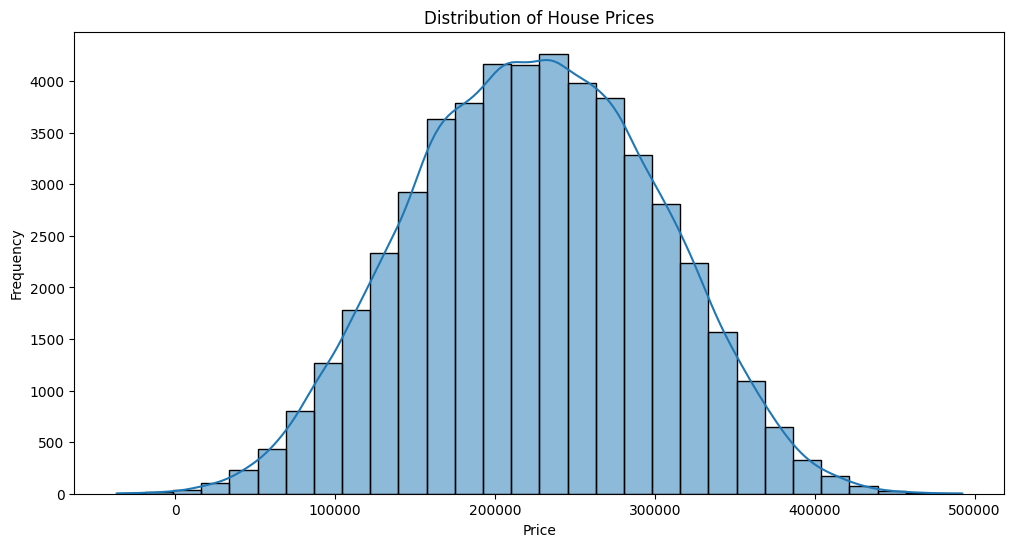

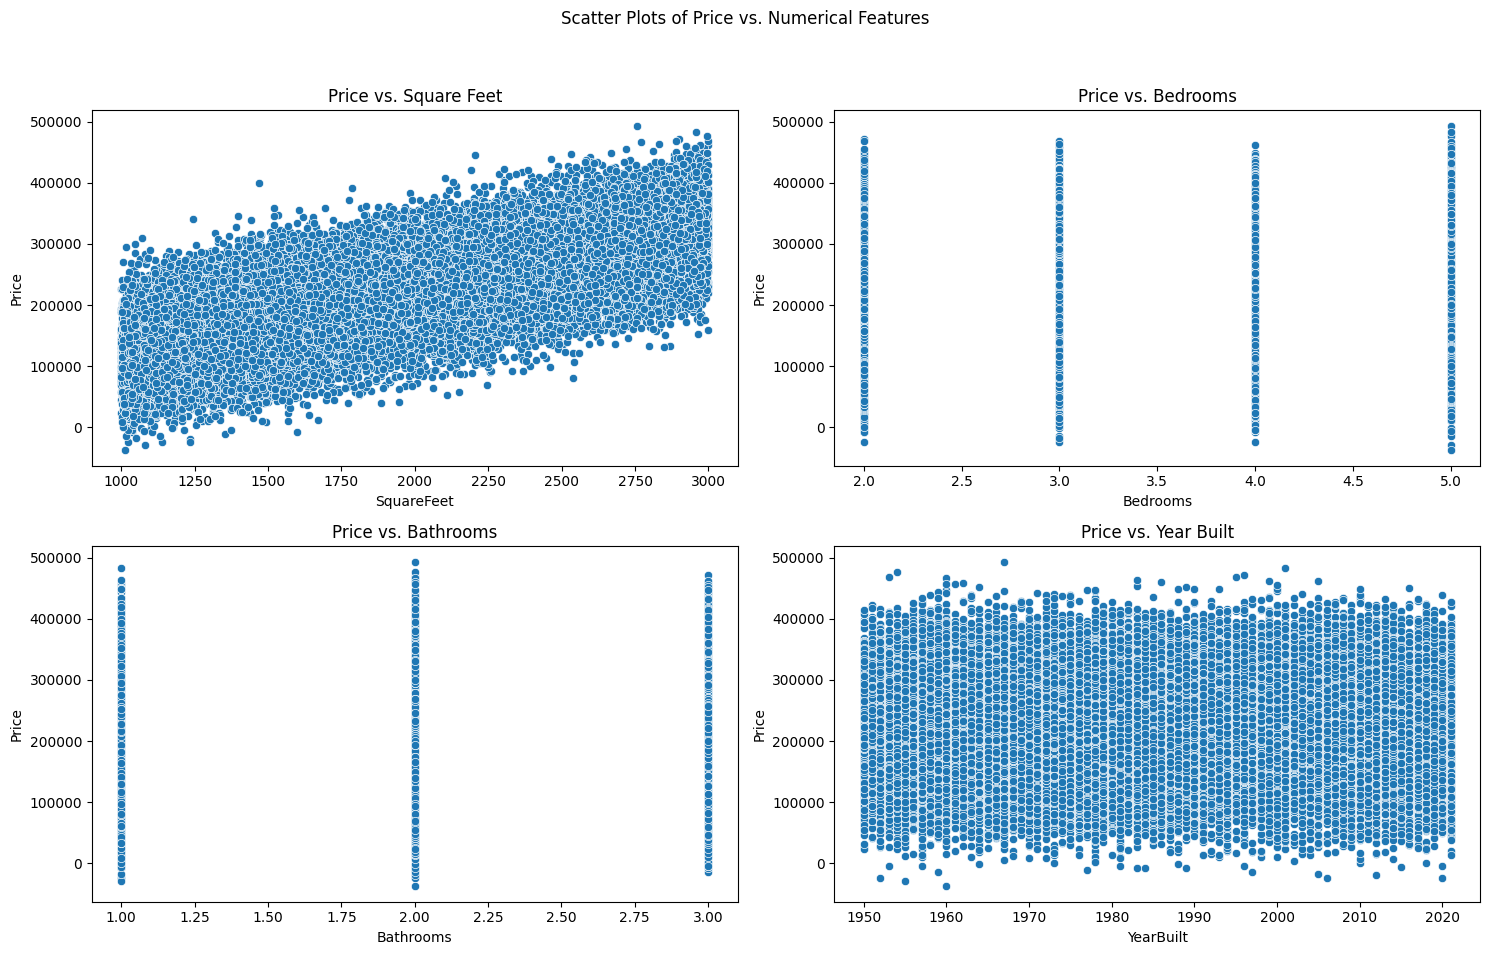

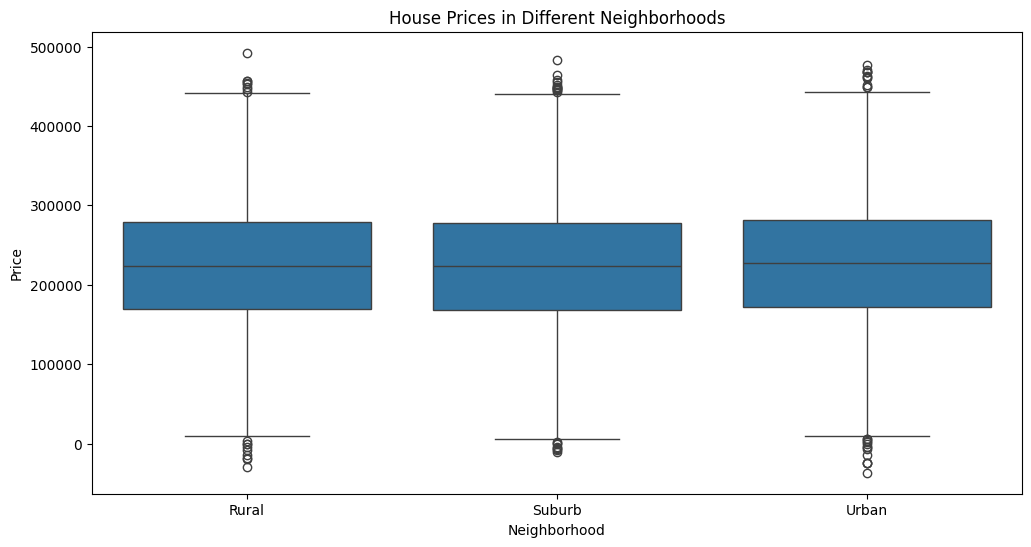

In [77]:
# 1. Verteilung Price
plt.figure(figsize=(12, 6))
sns.histplot(housing_data['Price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 2. Scatter plots Price vs. andere numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Scatter Plots of Price vs. Numerical Features')

# Price & SquareFeet
sns.scatterplot(ax=axes[0, 0], data=housing_data, x='SquareFeet', y='Price')
axes[0, 0].set_title('Price vs. Square Feet')

# Price & Bedrooms
sns.scatterplot(ax=axes[0, 1], data=housing_data, x='Bedrooms', y='Price')
axes[0, 1].set_title('Price vs. Bedrooms')

# Price & Bathrooms
sns.scatterplot(ax=axes[1, 0], data=housing_data, x='Bathrooms', y='Price')
axes[1, 0].set_title('Price vs. Bathrooms')

# Price & YearBuilt
sns.scatterplot(ax=axes[1, 1], data=housing_data, x='YearBuilt', y='Price')
axes[1, 1].set_title('Price vs. Year Built')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Box plot Prices in verschiedenen Neighborhoods
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='Price', data=housing_data)
plt.title('House Prices in Different Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price')

plt.show()

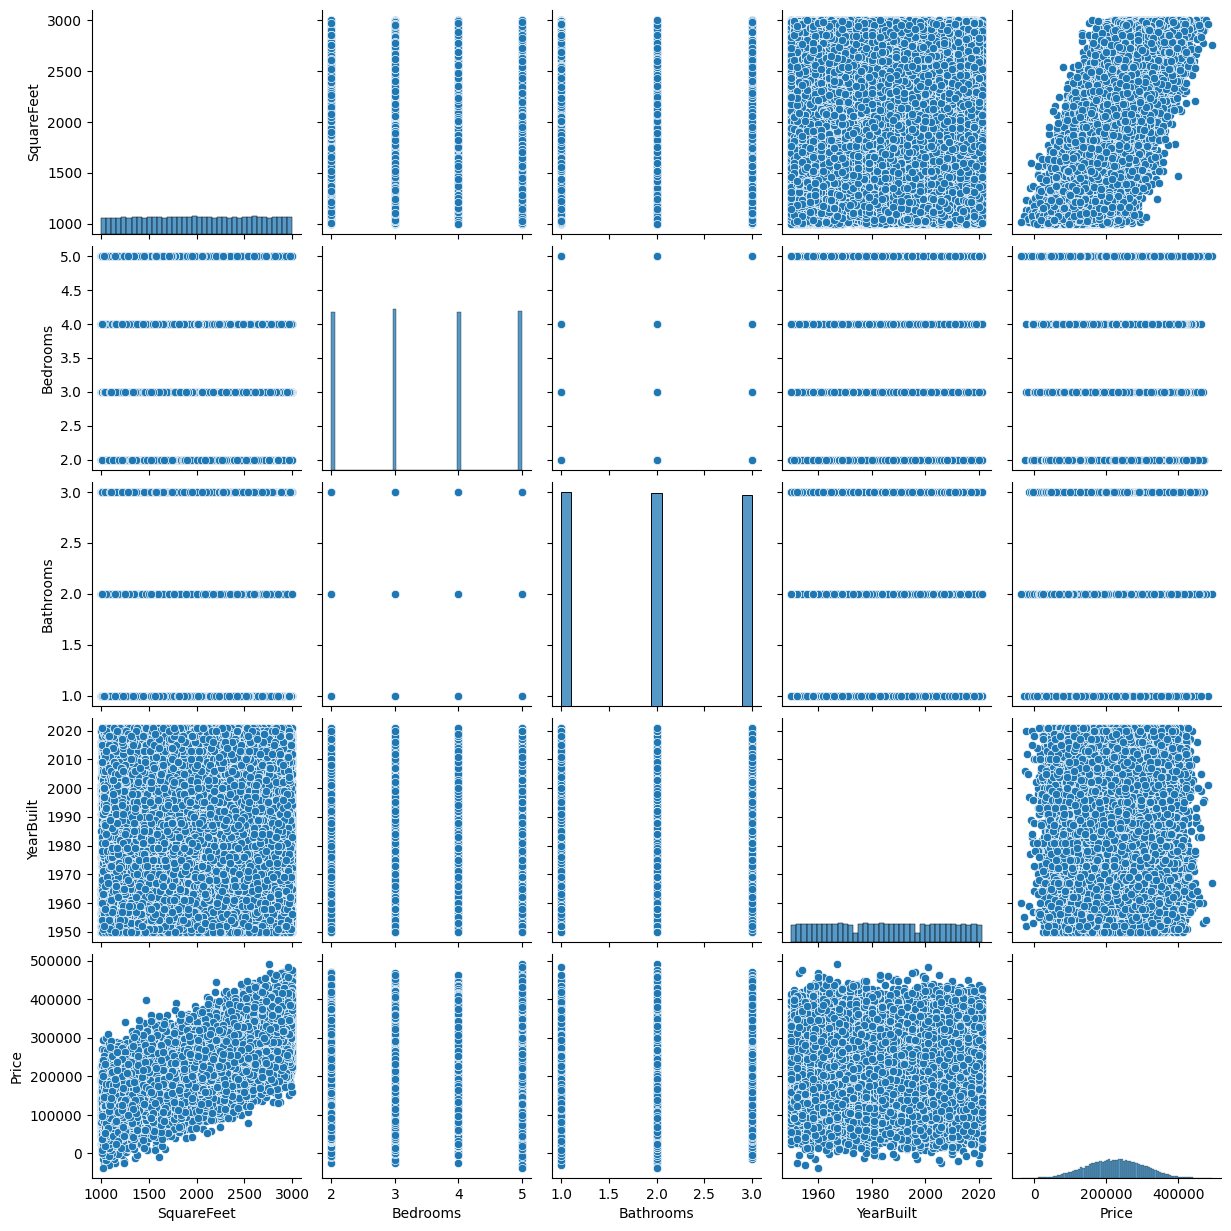

In [78]:
sns.pairplot(housing_data)
plt.show()

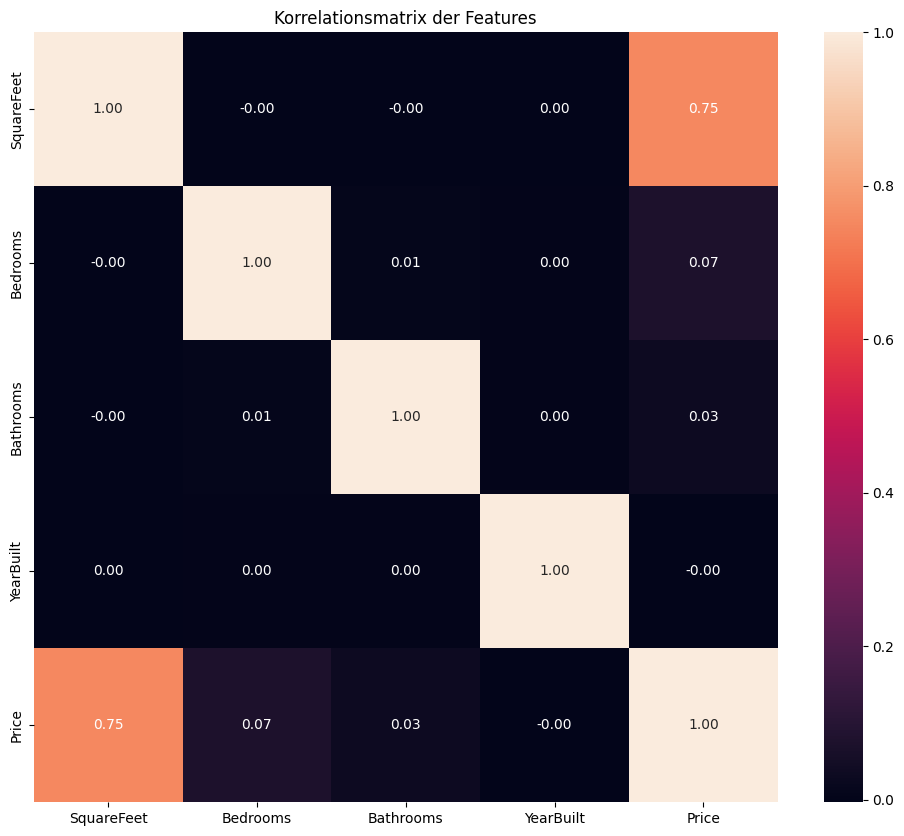

In [79]:
# ohne kategoriale Spalten
numerical_data = housing_data.select_dtypes(include=[np.number])

# Korrelation
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f")
plt.title('Korrelationsmatrix der Features')
plt.show()

## Bereinigen, Extrahieren und Transformieren

Um die Daten für das Training eines maschinellen Lernmodells vorzubereiten, müssen wir die folgenden Schritte durchführen:

* Bereinigung der Daten: Überprüfen auf fehlende Werte oder Anomalien und diese entsprechend behandeln.
* Feature-Extraktion: Auswahl der relevanten Merkmale, die zur Vorhersage des Hauspreises verwendet werden sollen.
* 
Feature-Transformation: Umwandlung kategorialer Daten in eine Form, die von ML-Modellen verarbeitet werden kann (z.B. One-Hot-Encoding für die Nachbarschaft), und Skalierung oder Normalisierung der numerischen Daten.

In [80]:
# 1. Data Cleaning
# Fehlende Werte? NEIN!
missing_values = housing_data.isnull().sum()

# Prüfen von Annomalien (negative values)
anomalies_count = housing_data[housing_data['Price'] < 0].shape[0]
anomalies_countYearBuilt = housing_data[housing_data['YearBuilt'] < 0].shape[0]
anomalies_countBathrooms = housing_data[housing_data['Bathrooms'] < 0].shape[0]
anomalies_countBedrooms = housing_data[housing_data['Bedrooms'] < 0].shape[0]
anomalies_countSquareFeet = housing_data[housing_data['SquareFeet'] < 0].shape[0]

print(f"Anzahl der Anomalien (negative Preise): {anomalies_count}")
print(f"Anzahl der Anomalien (negatives YearBuilt): {anomalies_countYearBuilt}")
print(f"Anzahl der Anomalien (negative Bathrooms): {anomalies_countBathrooms}")
print(f"Anzahl der Anomalien (negative Bedrooms): {anomalies_countBedrooms}")
print(f"Anzahl der Anomalien (negative SquareFeet): {anomalies_countSquareFeet}")

# 2. Feature Extraction
# Wählen relevanter Features => model
features = housing_data[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Neighborhood']]
target = housing_data['Price']

# 3. Feature Transformation
# One-Hot-Encoding für 'Neighborhood' 
one_hot_encoder = OneHotEncoder()
neighborhood_encoded = one_hot_encoder.fit_transform(features[['Neighborhood']]).toarray()
neighborhood_encoded_df = pd.DataFrame(neighborhood_encoded, columns=one_hot_encoder.get_feature_names_out(['Neighborhood']))

# Dropping von der original 'Neighborhood' => nur noch encoded
features = features.drop('Neighborhood', axis=1)
features_encoded = pd.concat([features, neighborhood_encoded_df], axis=1)

# Scaling numerical features (alle Features in einem ähnlichen Wertebereich liegen)
scaler = StandardScaler()
numerical_features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']
features_encoded[numerical_features] = scaler.fit_transform(features_encoded[numerical_features])

# Splitting the dataset into training and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

missing_values, features_encoded.head()

Anzahl der Anomalien (negative Preise): 22
Anzahl der Anomalien (negatives YearBuilt): 0
Anzahl der Anomalien (negative Bathrooms): 0
Anzahl der Anomalien (negative Bedrooms): 0
Anzahl der Anomalien (negative SquareFeet): 0


(SquareFeet      0
 Bedrooms        0
 Bathrooms       0
 Neighborhood    0
 YearBuilt       0
 Price           0
 dtype: int64,
    SquareFeet  Bedrooms  Bathrooms  YearBuilt  Neighborhood_Rural   
 0    0.207861  0.449067  -1.220113  -0.791751                 1.0  \
 1    0.786480 -0.446738   0.005614  -0.260842                 1.0   
 2   -0.254340 -1.342543  -1.220113  -0.743486                 0.0   
 3    0.499777 -1.342543  -1.220113   0.511390                 0.0   
 4    0.214811  1.344872   0.005614   0.752713                 0.0   
 
    Neighborhood_Suburb  Neighborhood_Urban  
 0                  0.0                 0.0  
 1                  0.0                 0.0  
 2                  1.0                 0.0  
 3                  0.0                 1.0  
 4                  1.0                 0.0  )

1. Datenbereinigung:
* Es gibt keine fehlenden Werte in den Daten.
* Es gibt einige Anomalien in den Hauspreisen, wie negative Werte. Diese sind wahrscheinlich auf Dateneingabefehler zurückzuführen. In einer realen Anwendung würden wir diese Einträge entweder korrigieren oder entfernen. Für diese Demonstration können wir sie ignorieren, da ihre Anzahl im Vergleich zur Gesamtgröße des Datensatzes gering ist.
  
2. Feature-Extraktion:
* Die relevanten Merkmale (`Wohnfläche, Anzahl der Schlafzimmer, Badezimmer, Baujahr und Nachbarschaft`) wurden ausgewählt.

3. Feature-Transformation:
* Die kategoriale Variable `"Neighborhood"` wurde mittels One-Hot-Encoding in numerische Werte umgewandelt.
* Numerische Merkmale wurden standardisiert, um sie auf einen ähnlichen Skalenbereich zu bringen.

## Model Selection & Training

Für die Preisvorhersage werde ich ein Regressionsmodell verwenden. Ein gängiger und effektiver Algorithmus für Regressionsaufgaben ist der Gradient Boosting Regressor.<br>
Dieser Algorithmus ist bekannt für seine Effektivität bei vielen Vorhersageaufgaben und bietet eine gute Balance zwischen Vorhersagegenauigkeit und Modellkomplexität.

In [53]:
# 1. Model Selection: Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Redundant => Später entfernen

# 2. Training the model
model.fit(X_train, y_train)

# 3. Evaluating the model
# Predictions on the test set
y_pred_val = model.predict(X_val)

# Calculating metrics
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Validation MSE:", mse_val)
print("Validation R²:", r2_val)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R²:", r2)

Validation MSE: 2481518488.4800806
Validation R²: 0.5704124222952475
Test MSE: 2443934848.435563
Test R²: 0.5742239188539706


Ein `R²-Wert` von `0,574` deutet darauf hin, dass das Modell eine moderate Vorhersagegenauigkeit hat.<br>
Diese Ergebnisse zeigen, dass das Modell eine angemessene Leistung erbringt, aber es gibt definitiv Raum für Verbesserungen. 

### Kreuzvalidierung Gradient Boosting Regressor

Um eine gründlichere Bewertung der Modellleistung zu erhalten, werde ich eine Kreuzvalidierung durchführen.<br>
Dabei wird der Datensatz in mehrere "Folds" (Teile) unterteilt, und das Modell wird mehrmals trainiert, wobei jeweils ein unterschiedlicher Fold als Testdatensatz verwendet wird. Die übliche Praxis ist die Verwendung von 5 oder 10 Folds.

In [54]:
# 5-fold cross-validation
cv_mse = cross_val_score(model, features_encoded, target, cv=5, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(model, features_encoded, target, cv=5, scoring='r2')

# average MSE and R2
avg_mse = -cv_mse.mean()  # Negative MSE is returned by cross_val_score, so we negate it
avg_r2 = cv_r2.mean()

avg_mse, avg_r2

(2500036423.9311743, 0.5687511548875437)

Die Ergebnisse der 5-fachen Kreuzvalidierung für das Gradient Boosting Regressionsmodell sind wie folgt:
* `Durchschnittlicher Mean Squared Error (MSE)`: 2.500.036.423,93. Dieser Wert ist ein Durchschnitt über alle fünf Folds und gibt uns eine Vorstellung davon, wie konsistent das Modell über verschiedene Teile des Datensatzes hinweg ist.
* `Durchschnittlicher R²-Wert: 0,569.` Dies zeigt die durchschnittliche Fähigkeit des Modells, die Varianz des Hauspreises über die verschiedenen Folds hinweg zu erklären.
  
Diese Ergebnisse bestätigen, dass das Modell eine moderate Vorhersagegenauigkeit aufweist

###  Andere Modelle testen

Neben dem Gradient Boosting Regressor gibt es andere Algorithmen, die sich für die Regression eignen und möglicherweise bessere Ergebnisse liefern. Einige dieser Algorithmen sind:
* `Linear Regression`: Ein einfacheres Modell, das nützlich sein kann, wenn die Beziehung zwischen den Features und dem Ziel linear ist.
* `Support Vector Regression (SVR)`: Kann effektiv sein in Fällen, in denen die Beziehung zwischen den Features und dem Ziel komplex ist.
* `Random Forest Regressor`: Ein Ensemble-Lernmodell, das auf vielen Entscheidungsbäumen basiert.
ist.

In [61]:
# Initialisierung der Modelle
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
lr_model = LinearRegression()
svr_model = SVR(kernel='rbf')

models = {
    "Random Forest Regressor": rf_model,
    "Linear Regression": lr_model,
    "Support Vector Regression": svr_model
}

cv_results = {}
for model_name, model in models.items():
    mse_scores = cross_val_score(model, features_encoded, target, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    r2_scores = cross_val_score(model, features_encoded, target, cv=3, scoring='r2', n_jobs=-1)
    mae_scores = cross_val_score(model, features_encoded, target, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

    cv_results[model_name] = {
        "Average MSE": -np.mean(mse_scores),
        "Average R²": np.mean(r2_scores),
        "Average MAE": -np.mean(mae_scores)
    }

for model_name, scores in cv_results.items():
    print(f"{model_name}:")
    print(f"  Durchschnittlicher MSE: {scores['Average MSE']}")
    print(f"  Durchschnittlicher R²: {scores['Average R²']}")
    print(f"  Durchschnittlicher MAE: {scores['Average MAE']}\n")

Random Forest Regressor:
  Durchschnittlicher MSE: 2846208845.5602074
  Durchschnittlicher R²: 0.5090404203713971
  Durchschnittlicher MAE: 42639.185643125325

Linear Regression:
  Durchschnittlicher MSE: 2492496481.325271
  Durchschnittlicher R²: 0.5700544824822754
  Durchschnittlicher MAE: 39904.651063164005

Support Vector Regression:
  Durchschnittlicher MSE: 5635193876.732811
  Durchschnittlicher R²: 0.02795268454914231
  Durchschnittlicher MAE: 61219.96532360349



Die Ergebnisse Ihrer Kreuzvalidierung für drei verschiedene Modelle – `Random Forest Regressor`, `Lineare Regression` und `Support Vector Regression (SVR)`. <br>

### Random Forest Regressor
* Durchschnittlicher MSE: 2.846.208.845,56 => Der relativ hohe Mean Squared Error (MSE) deutet darauf hin, dass die Vorhersagen des Modells im Durchschnitt einen beträchtlichen Fehler aufweisen.
* Durchschnittlicher R²: 0,5090 => Ein R²-Wert von etwas über 0,5 zeigt, dass das Modell etwa die Hälfte der Variabilität in den Zielwerten erklären kann.
* Durchschnittlicher MAE: 42.639,19 => Der Mean Absolute Error (MAE) gibt den durchschnittlichen absoluten Fehler der Vorhersagen an. Ein MAE von etwa 42.639 könnte hoch sein, abhängig vom Kontext der Immobilienpreise in Ihrem Datensatz.

### Lineare Regression

* Durchschnittlicher MSE: 2.492.496.481,33 => Der MSE ist niedriger als beim Random Forest, was auf eine bessere durchschnittliche Vorhersagegenauigkeit hindeutet.
* Durchschnittlicher R²: 0,5701 => Dieser Wert ist höher als beim Random Forest, was bedeutet, dass die lineare Regression einen größeren Anteil der Varianz in den Zielwerten erklären kann.
* Durchschnittlicher MAE: 39.904,65 => Der MAE ist ebenfalls niedriger als beim Random Forest, was auf eine bessere durchschnittliche Genauigkeit der Vorhersagen hinweist.


### Support Vector Regression

* Durchschnittlicher MSE: 5.635.193.876,733 => Dieser sehr hohe MSE-Wert zeigt, dass die Vorhersagen des Modells im Durchschnitt weit vom tatsächlichen Wert entfernt liegen.
* Durchschnittlicher R²: 0,0280 => Ein sehr niedriger R²-Wert impliziert, dass das Modell kaum in der Lage ist, die Variabilität der Zielwerte zu erklären.
* Durchschnittlicher MAE: 61.219,97 => Der höchste MAE unter den drei Modellen, was auf eine geringere Vorhersagegenauigkeit hinweist

Die lineare Regression zeigt die beste durchschnittliche Leistung über alle Metriken hinweg, was darauf hindeutet, dass sie für diesen speziellen Datensatz am besten geeignet sein könnte. Dies wird durch die höchsten R²-Werte und die niedrigsten MSE- und MAE-Werte angezeigt. <br> dem höchsten R²-Wert.
Der Random Forest Regressor bietet eine moderate Leistung, die besser ist als die SVR, aber nicht so gut wie  <br>die lineare Regression.
Die Support Vector Regression zeigt die geringste Leistung unter den drei Modellen, was sich in den höchsten MSE- und MAE-Werten und dem niedrigste
gelt.
Schlussfolgerungen
Die lineare Regression könnte das bevorzugte Modell für diesen spezifischen Datensatz sein, insbesondere wenn Sie nach einem Modell suchen, das eine gute Balance zwischen Genauigkeit und Erklärungskraft bietet.

### Feature-Wichtigkeit Random Forest

In [64]:
# Feature-Wichtigkeit für Random Forest
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
print("Feature Wichtigkeiten:", feature_importances)

Feature Wichtigkeiten: [0.74076605 0.03007559 0.03332988 0.15381545 0.01403845 0.01399652
 0.01397806]
Beste Hyperparameter: {'max_depth': 10, 'n_estimators': 200}


Feature-Wichtigkeiten:
* Das erste Feature (`[0.74076605]`) scheint bei weitem das wichtigste zu sein, da es etwa 74% der Wichtigkeit ausmacht. Dies deutet darauf hin, dass dieses Feature einen wesentlichen Einfluss auf die Vorhersage des Modells hat.
* Die Features `[0.03007559]`, `[0.03332988]`, und `[0.15381545]` haben ebenfalls einen gewissen Einfluss, wobei das vierte Feature mit etwa 15% Wichtigkeit das zweitwichtigste ist.
* .
Die letzten drei Feature`s ([0.014038`45`], [0.013996`52`], [0.013978`06]) scheinen relativ geringen Einfluss auf die Vorhersagen des Modells zu haben.

#### Feature Engineering: 
Aufgrund der hohen Wichtigkeit des ersten Features könnte man versuchen, zusätzliche Features zu erstellen, die ähnliche oder ergänzende Informationen enthalten. Dies könnte die Leistung des Modells weiter verbessern. <br>
Ebenfalls könnte man das Modell mit unterschiedlichen Kombinationen von Features testen, insbesondere indem man weniger wichtige Features entfernen, um zu sehen, wie sich dies auf die Leistung auswirkt.

### Hyperparameter-Tuning Random Forest

In [ ]:
# Hyperparameter-Tuning für Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Beste Hyperparameter:", grid_search.best_params_)

Analyse der Hyperparameter-Ergebnisse
* `max_depth=10`: Dieser Wert legt die maximale Tiefe jedes Baumes im Random Forest fest. Eine Tiefe von 10 bedeutet, dass jeder Baum Entscheidungen bis zu einer Tiefe von 10 Ebenen treffen kann. Eine begrenzte Tiefe kann helfen, Overfitting zu vermeiden, da die Bäume nicht zu komplex werden. Es ist ein Kompromiss zwischen Modellgenauigkeit und Generalisierungsfähigkeit.
* `n_estimators=200`: Dies ist die Anzahl der Bäume im Random Forest. Ein höherer Wert führt in der Regel zu einer besseren Leistung des Modells, kann aber auch die Berechnungszeit und den Speicherbedarf erhöhen. 200 Bäume stellen eine erhebliche Anzahl dar, die wahrscheinlich dazu beiträgt, die Varianz in den Vorhersagen zu reduzieren und die Genauigkeit zu verbessern.

### Weiteres Tuning basierend auf neuen Werten


In [65]:
# Festlegen des Hyperparameter-Raums
param_grid = {
    'max_depth': [10],  # Basierend auf vorherigen Ergebnissen
    'n_estimators': [200],  # Basierend auf vorherigen Ergebnissen
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search initialisieren
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           scoring='neg_mean_squared_error')

# Grid Search durchführen
grid_search.fit(X_train, y_train)

# Beste Hyperparameter anzeigen
print("Beste Hyperparameter:", grid_search.best_params_)

Beste Hyperparameter: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


Das Ergebnis der `Grid-Search-Hyperparameter-Optimierung` zeigt, dass die besten gefundenen Hyperparameter für das Random Forest-Modell `max_depth=10`, `min_samples_leaf=1`, `min_samples_split=6` und `n_estimators=200` sind.<br> 
Hier ist, was jedes dieser Hyperparameter bedeutet und wie sie sich auf Ihr Modell auswirken:

`max_depth=10`: => 
Dies legt die maximale Tiefe jedes Baumes im Wald fest. Eine maximale Tiefe von 10 hilft, Overfitting zu verhindern, indem sie verhindert, dass die Bäume zu komplex werde <br>
`min_samples_leaf=1`: => :

Dies bedeutet, dass mindestens ein Sample in jedem Blatt des Baumes benötigt wird. Dies ist die Standardkonfiguration und ermöglicht jedem Baum, bis zur größtmöglichen Tiefe zu wachsen, ohne durch die Anzahl der Samples in den Blättern eingeschränkt zu we<br>
`den.
min_samples_s`p => t=6:

Dies erfordert, dass ein Knoten mindestens 6 Samples enthalten muss, um eine Aufteilung vorzunehmen. Ein höherer Wert als der Standard verhindert das Überanpassen, indem er die Tiefe der Bäume b<br>
`grenzt.
n_estim`a => rs=200:

Dies ist die Anzahl der Bäume im Wald. Mehr Bäume können die Vorhersagegenauigkeit verbessern, benötigen jedoch mehr Rechenzeit und Speicher.

### Modell mit optimierten Hyperparametern trainieren

Verwenden der optimierten Hyperparameter, um das Random Forest-Modell erneut zu trainieren und erneutes Evaluieren der Leistung.

In [69]:
optimierter_rf_model = RandomForestRegressor(
    n_estimators=200, 
    max_depth=10, 
    min_samples_split=6, 
    min_samples_leaf=1, 
    random_state=42
)
optimierter_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=6, n_estimators=200,
                      random_state=42)

### Evaluierung des Modells auf dem Testdatensatz

In [70]:
# Vorhersagen auf dem Testdatensatz machen
y_pred_test = optimierter_rf_model.predict(X_test)

# Berechnung der Leistungsmetriken
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Test MSE:", mse_test)
print("Test R²:", r2_test)

Test MSE: 2477438064.5387106
Test R²: 0.5683870741985911


Analyse des Vergleichs
Verbesserung im MSE: Der MSE hat sich von etwa 2,85 Milliarden auf 2,48 Milliarden verringert. Dies deutet darauf hin, dass das optimierte Modell durchschnittlich genauere Vorhersagen macht als das ursprüngliche Modell.
Verbesserung im R²: Der R²-Wert ist von 0,5090 auf 0,5684 gestiegen. Das bedeutet, dass das optimierte Modell einen höheren Anteil der Varianz in den Testdaten erklärt, was auf eine verbesserte Modellleistung hindeutet.
Schlussfolgerungen
Die Optimierung der Hyperparameter hat zu einer merklichen Verbesserung der Modellleistung geführt, sowohl in Bezug auf die Genauigkeit der Vorhersagen (MSE) als auch auf die Erklärungskraft des Modells (R²).
Diese Verbesserungen sind ein gutes Zeichen dafür, dass die Anpassungen der Hyperparameter effektiv waren.

### Feature-Wichtigkeit Lineare Modelle

In [68]:
lr_model.fit(X_train, y_train)
feature_importances = abs(lr_model.coef_)
print("Feature Wichtigkeiten:", feature_importances)

Feature Wichtigkeiten: [5.72651479e+04 5.90932259e+03 2.09136208e+03 1.83439639e+02
 4.18208093e+17 4.18208093e+17 4.18208093e+17]


Analyse der Feature-Wichtigkeiten
Die Wichtigkeiten sind unterschiedlich, wobei einige Features sehr hohe Werte und andere deutlich niedrigere Werte aufweisen.
Die ersten vier Features haben vergleichsweise geringe Wichtigkeiten (z.B. 57.265, 5.909 usw.).
Die letzten drei Features weisen außergewöhnlich hohe Wichtigkeiten auf (ungefähr 4.18e+17). Solche extrem hohen Koeffizienten sind ungewöhnlich und deuten oft auf Probleme im Modell hin.

### Hyperparameter-Tuning mit Ridge Regression

In [72]:
# Definieren eines Bereichs von alpha-Werten für das Tuning
alphas = np.logspace(-4, 4, 50)

# Initialisieren und Trainieren des RidgeCV-Modells
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_model.fit(X_train, y_train)

# Ausgabe des besten alpha-Werts
print("Bestes alpha für Ridge Regression:", ridge_model.alpha_)

Bestes alpha für Ridge Regression: 7.9060432109076855


Das Ergebnis Ihres Hyperparameter-Tunings für die Ridge Regression zeigt, dass der beste alpha-Wert bei etwa 7.906 liegt. Dieser Wert bestimmt die Stärke der L2-Regularisierung, die auf das lineare Regressionsmodell angewendet wird.

Interpretation
Ein alpha-Wert von 7.906 ist ein Indikator dafür, dass eine gewisse Menge an Regularisierung hilfreich ist, um die Leistung Ihres Modells zu verbessern. Es ist weder zu klein, was eine minimale Regularisierung bedeuten würde, noch zu groß, was auf eine sehr starke Regularisierung hindeuten würde.
Diese Regularisierung hilft, das Problem der Überanpassung (Overfitting) zu verringern und kann auch bei der Handhabung von Multikollinearität nützlich sein.

In [74]:
optimierter_ridge_model = Ridge(alpha=7.906)
optimierter_ridge_model.fit(X_train, y_train)
y_pred_test = optimierter_ridge_model.predict(X_test)

# Berechnen und Ausgeben der Test-Metriken
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Test MSE:", mse_test)
print("Test R²:", r2_test)

Test MSE: 2436136501.660072
Test R²: 0.5755825268919925


Analyse der Ergebnisse
Test MSE: Der Mean Squared Error ist ein Maß für den durchschnittlichen quadratischen Fehler der Vorhersagen des Modells. Ein niedrigerer MSE-Wert ist besser. Ihr optimiertes Ridge-Modell erzielte einen MSE von etwa 2,44 Milliarden. Dieser Wert sollte im Kontext der Skala Ihrer Zielvariable und im Vergleich zu den MSE-Werten vorheriger Modelle interpretiert werden.

Test R²: Der R-squared-Wert gibt an, welcher Anteil der Varianz in der Zielvariablen durch das Modell erklärt wird. Ein R²-Wert von 0,5756 bedeutet, dass das Modell etwa 57,56% der Varianz in den Testdaten erklärt. Dies ist ein Indikator für eine moderate Modellleistung und zeigt, dass das Modell einen signifikanten Teil der Varianz in Ihren Daten erfassen kann.

Vergleich mit vorherigen Modellen
Wenn Sie diese Ergebnisse mit denen Ihres ursprünglichen linearen Regressionsmodells oder anderen Modellen vergleichen, können Sie feststellen, ob die Regularisierung durch Ridge Regression zu einer Verbesserung der Leistung geführt hat.
Im Vergleich zu Ihrem vorherigen linearen Modell ohne Regularisierung (falls vorhanden), zeigt ein höherer R²-Wert und/oder ein niedrigerer MSE-Wert eine Verbesserung in der Modellleistung.
Schlussfolgerungen
Die Ergebnisse deuten darauf hin, dass das Ridge-Modell mit optimierten Hyperparametern eine ähnliche oder leicht verbesserte Leistung im Vergleich zu früheren Modellen aufweist.
Wenn dieses Modell die beste bisher erreichte Leistung aufweist, könnte es als Ihr bevorzugtes Modell für weitere Vorhersagen oder Analysen verwendet werden.